In [101]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [102]:
df=pd.read_csv('Resources/water_potability.csv')
first_row=df.iloc[3271,:9].values
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [103]:
first_row

array([4.66810169e+00, 1.93681736e+02, 4.75809916e+04, 7.16663893e+00,
       3.59948574e+02, 5.26424171e+02, 1.38944185e+01, 6.66876948e+01,
       4.43582091e+00])

In [104]:
new_df=df.dropna()   #df.bfill().ffill()

In [105]:
new_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [106]:
 #assigns the data to X and y
def input_output(df):
    
    X =new_df.drop(["Potability"],axis=1)
    y=new_df["Potability"].values.ravel()
    return X, y

In [107]:
X,y=input_output(new_df)

In [108]:
X.shape

(2011, 9)

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=42,shuffle=True)

In [110]:
print(y_train)

[0 0 1 ... 0 1 0]


In [111]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [112]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

In [113]:
max_depth = [int(x) for x in np.linspace(1,101,10)]
max_depth.append(None)
param_grid={'bootstrap':[False],
            'max_depth':[12],
            'max_features':['auto','log2'],
            'n_estimators': [100]}



water_grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,n_jobs=1,verbose=0,return_train_score=True)


In [114]:
water_model=water_grid.fit(X_train,y_train)

In [115]:
water_model.score(X_test,y_test)

0.6674937965260546

In [116]:
import joblib
# save
joblib.dump(water_model, "water_model.joblib")

# load, no need to initialize the loaded_rf
water_model2 = joblib.load("water_model.joblib")

In [120]:
list(water_model2.predict(first_row.reshape(1,-1)))

[1]

In [89]:
water_dict=water_model.best_params_

In [90]:
water_dict

{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 100}

In [95]:
first_row.reshape(1,-1).shape

(1, 9)

In [96]:
water_model.predict(first_row.reshape(1,-1))

array([1], dtype=int64)

In [17]:
water_model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [19]:
classifier.score(X_test_scaled,y_test)

0.5707196029776674

In [20]:
from tensorflow.keras.utils import to_categorical
# first, create a normal neural network with 9 inputs, 9 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [22]:
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [23]:
model = Sequential()
model.add(Dense(units=9, activation='relu', input_dim=9))
model.add(Dense(units=9, activation='relu', input_dim=10))
model.add(Dense(units=2, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 20        
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=93,
    shuffle=True,
    verbose=2)

Epoch 1/93
51/51 - 0s - loss: 0.7224 - accuracy: 0.5199
Epoch 2/93
51/51 - 0s - loss: 0.6970 - accuracy: 0.5553
Epoch 3/93
51/51 - 0s - loss: 0.6843 - accuracy: 0.5765
Epoch 4/93
51/51 - 0s - loss: 0.6762 - accuracy: 0.5933
Epoch 5/93
51/51 - 0s - loss: 0.6705 - accuracy: 0.5995
Epoch 6/93
51/51 - 0s - loss: 0.6655 - accuracy: 0.6088
Epoch 7/93
51/51 - 0s - loss: 0.6612 - accuracy: 0.6157
Epoch 8/93
51/51 - 0s - loss: 0.6569 - accuracy: 0.6231
Epoch 9/93
51/51 - 0s - loss: 0.6527 - accuracy: 0.6331
Epoch 10/93
51/51 - 0s - loss: 0.6485 - accuracy: 0.6362
Epoch 11/93
51/51 - 0s - loss: 0.6442 - accuracy: 0.6412
Epoch 12/93
51/51 - 0s - loss: 0.6389 - accuracy: 0.6430
Epoch 13/93
51/51 - 0s - loss: 0.6339 - accuracy: 0.6517
Epoch 14/93
51/51 - 0s - loss: 0.6288 - accuracy: 0.6567
Epoch 15/93
51/51 - 0s - loss: 0.6232 - accuracy: 0.6586
Epoch 16/93
51/51 - 0s - loss: 0.6186 - accuracy: 0.6685
Epoch 17/93
51/51 - 0s - loss: 0.6132 - accuracy: 0.6748
Epoch 18/93
51/51 - 0s - loss: 0.6076 - 

In [36]:
model.save("potable_water_ann_model.h5")
from tensorflow.keras.models import load_model
model = load_model("potable_water_ann_model.h5")

In [40]:
to_categorical(model.predict(X_test))

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       ...,

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]], dtype=float32)

In [27]:
from sklearn import tree

In [28]:
# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test, y_test)

0.4267990074441687

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.605
k: 3, Train/Test Score: 0.815/0.618
k: 5, Train/Test Score: 0.779/0.628
k: 7, Train/Test Score: 0.744/0.608
k: 9, Train/Test Score: 0.729/0.633
k: 11, Train/Test Score: 0.719/0.623
k: 13, Train/Test Score: 0.712/0.638
k: 15, Train/Test Score: 0.704/0.633
k: 17, Train/Test Score: 0.697/0.625
k: 19, Train/Test Score: 0.685/0.608


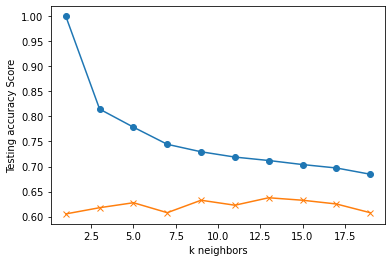

In [31]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.638


In [33]:

predicted_class = knn.predict(X_test)
print(predicted_class)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
print(y_test)

[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1
 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1
 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0
 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0]
